In [1]:
import torch
import numpy as np
import pickle
import os
import sys
import matplotlib.pyplot as plt

from model.baseline.lstm import LSTM
from utils.loss import rmse
from utils.F_train_validate import fit, validate
from configs.LSTM_GRU_configs import Configs

# return to main dir
current_directory = os.getcwd()
main_dir = os.path.dirname(current_directory+'/dataloader/')
sys.path.append(main_dir)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'avaiable device: {device}')

avaiable device: cuda


In [2]:
# random seed
seed = 77
torch.manual_seed(seed)
np.random.seed(seed)

if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [3]:
with open('dataloader/save/LSTM_GRU/train_loader.pkl', 'rb') as file:
    train_loader = pickle.load(file)
with open('dataloader/save/LSTM_GRU/val_loader.pkl', 'rb') as file:
    val_loader = pickle.load(file)
print('training and validation dataloaders are loaded!')

training and validation dataloaders are loaded!


In [4]:
lr = 5e-6
epochs = 20
patience = 5
model_save_dir = os.path.dirname(main_dir) + '/model_save/LSTM.pth'

In [5]:
configs = Configs()
model = LSTM(configs).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train_loss, val_loss = fit(model, epochs, train_loader, val_loader,
                           optimizer, rmse, patience=patience,
                           model_save_dir=model_save_dir, device=device)

Epoch No.1 || Training loss: 0.271989 || Validation loss: 0.021949 || Time: 35.383 sec
Epoch No.2 || Training loss: 0.01392 || Validation loss: 0.008177 || Time: 35.123 sec
Epoch No.3 || Training loss: 0.010787 || Validation loss: 0.00646 || Time: 35.284 sec
Epoch No.4 || Training loss: 0.009799 || Validation loss: 0.005615 || Time: 35.242 sec
Epoch No.5 || Training loss: 0.009191 || Validation loss: 0.004712 || Time: 35.368 sec
Epoch No.6 || Training loss: 0.00887 || Validation loss: 0.004117 || Time: 35.756 sec
Epoch No.7 || Training loss: 0.008516 || Validation loss: 0.003502 || Time: 35.007 sec
Epoch No.8 || Training loss: 0.008428 || Validation loss: 0.003527 || Time: 35.248 sec
Epoch No.9 || Training loss: 0.008192 || Validation loss: 0.003491 || Time: 35.117 sec
Epoch No.10 || Training loss: 0.008185 || Validation loss: 0.00282 || Time: 35.349 sec
Epoch No.11 || Training loss: 0.008048 || Validation loss: 0.002615 || Time: 35.575 sec
Epoch No.12 || Training loss: 0.007982 || Val

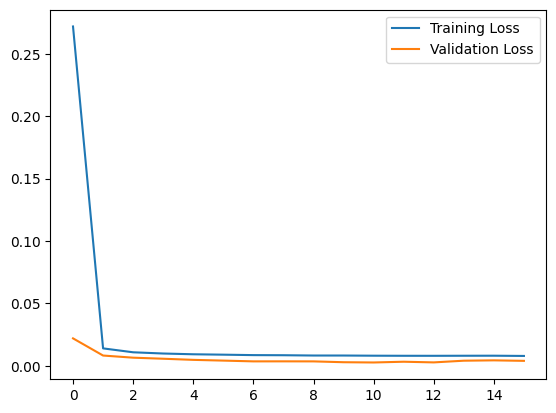

In [6]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

In [7]:
with open('dataloader/save/LSTM_GRU/US06_test_loader.pkl', 'rb') as file:
    US06_test_loader = pickle.load(file)
with open('dataloader/save/LSTM_GRU/HWFTa_test_loader.pkl', 'rb') as file:
    HWFTa_test_loader = pickle.load(file)
with open('dataloader/save/LSTM_GRU/HWFTb_test_loader.pkl', 'rb') as file:
    HWFTb_test_loader = pickle.load(file)
with open('dataloader/save/LSTM_GRU/eneroc_test_loader.pkl', 'rb') as file:
    eneroc_test_loader = pickle.load(file)
print(f'Test dataloaders are loaded!')

Test dataloaders are loaded!


In [8]:
# load best model
best_model = LSTM(configs).to(device)
best_model.load_state_dict(torch.load(model_save_dir))

<All keys matched successfully>

RMSE Loss: 0.006121370475739241


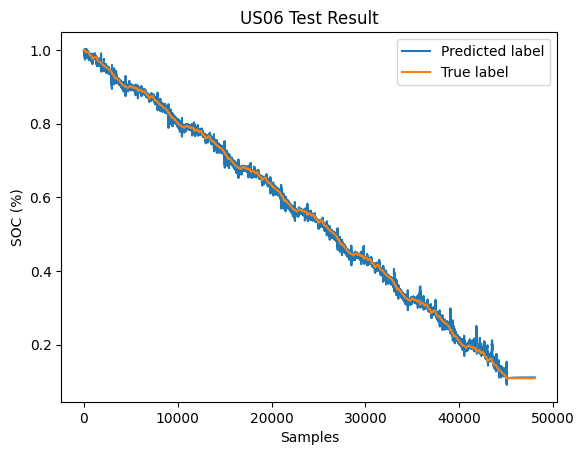

In [9]:
US06_val_loss_epoch, US06_target_log, US06_pred_log = validate(best_model, US06_test_loader, rmse, device=device)

plt.plot(US06_pred_log.reshape(-1).cpu(), label='Predicted label')
plt.plot(US06_target_log.reshape(-1).cpu(), label='True label')
plt.title('US06 Test Result')
plt.xlabel('Samples')
plt.ylabel('SOC (%)')
plt.legend()
print(f'RMSE Loss: {rmse(US06_pred_log, US06_target_log)}')

RMSE Loss: 0.0021932516247034073


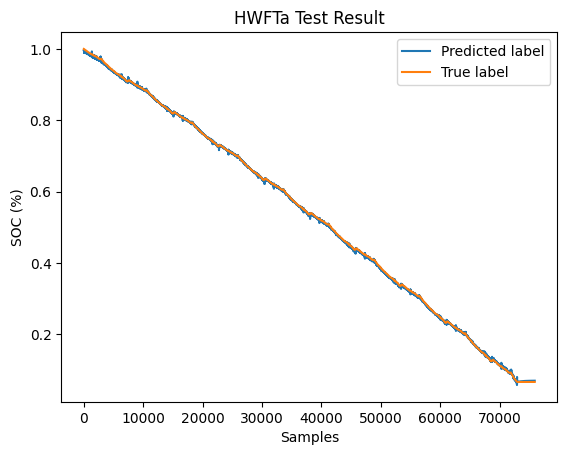

In [10]:
HWFTa_val_loss_epoch, HWFTa_target_log, HWFTa_pred_log = validate(best_model, HWFTa_test_loader, rmse, device=device)

plt.plot(HWFTa_pred_log.reshape(-1).cpu(), label='Predicted label')
plt.plot(HWFTa_target_log.reshape(-1).cpu(), label='True label')
plt.title('HWFTa Test Result')
plt.xlabel('Samples')
plt.ylabel('SOC (%)')
plt.legend()
print(f'RMSE Loss: {rmse(HWFTa_pred_log, HWFTa_target_log)}')

RMSE Loss: 0.0021380234975367785


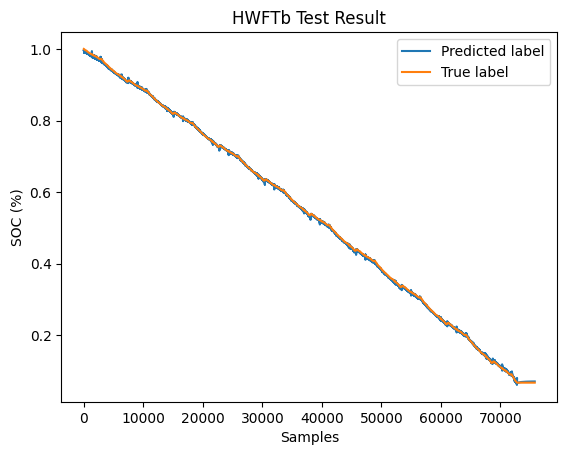

In [11]:
HWFTb_val_loss_epoch, HWFTb_target_log, HWFTb_pred_log = validate(best_model, HWFTb_test_loader, rmse, device=device)

plt.plot(HWFTb_pred_log.reshape(-1).cpu(), label='Predicted label')
plt.plot(HWFTb_target_log.reshape(-1).cpu(), label='True label')
plt.title('HWFTb Test Result')
plt.xlabel('Samples')
plt.ylabel('SOC (%)')
plt.legend()
print(f'RMSE Loss: {rmse(HWFTb_pred_log, HWFTb_target_log)}')

RMSE Loss: 0.4484904408454895


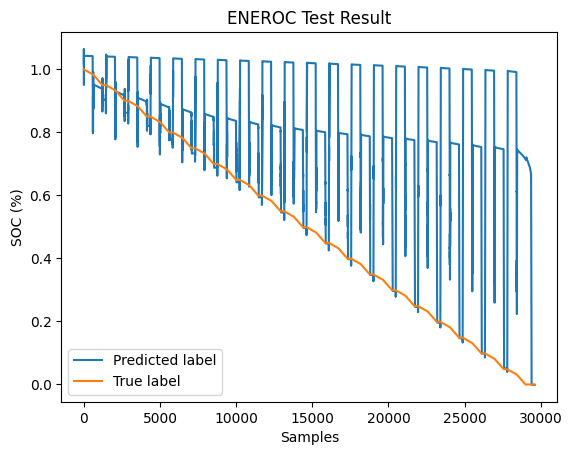

In [12]:
eneroc_val_loss_epoch, eneroc_target_log, eneroc_pred_log = validate(best_model, eneroc_test_loader, rmse, device=device)

plt.plot(eneroc_pred_log.reshape(-1).cpu(), label='Predicted label')
plt.plot(eneroc_target_log.reshape(-1).cpu(), label='True label')
plt.title('ENEROC Test Result')
plt.xlabel('Samples')
plt.ylabel('SOC (%)')
plt.legend()
print(f'RMSE Loss: {rmse(eneroc_pred_log, eneroc_target_log)}')